In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree





In [27]:

# Baca data langsung dari URL
url = 'https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/Breast_Cancer.csv'
df = pd.read_csv(url)

# Lihat beberapa baris pertama dari dataset
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [29]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [30]:
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


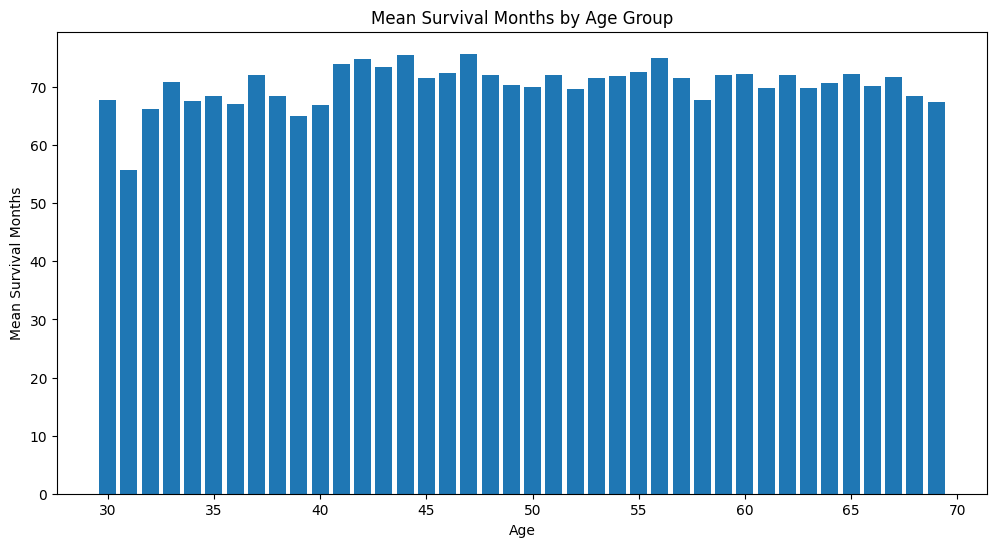

In [31]:
# prompt: Age	Race	Marital Status	T Stage	N Stage	6th Stage	differentiate	Grade	A Stage	Tumor Size	Estrogen Status	Progesterone Status	Regional Node Examined	Reginol Node Positive	Survival Months	Status buatkan # Mengubah scatter plot menjadi bar plot bentuk lainnya

# Mengubah scatter plot menjadi bar plot
# Misalnya, kita ingin melihat hubungan antara 'Age' dan 'Survival Months' dengan bar plot

# Group data by age and calculate the mean survival months for each age group
age_survival_mean = df.groupby('Age')['Survival Months'].mean()

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(age_survival_mean.index, age_survival_mean.values)
plt.xlabel('Age')
plt.ylabel('Mean Survival Months')
plt.title('Mean Survival Months by Age Group')
plt.show()



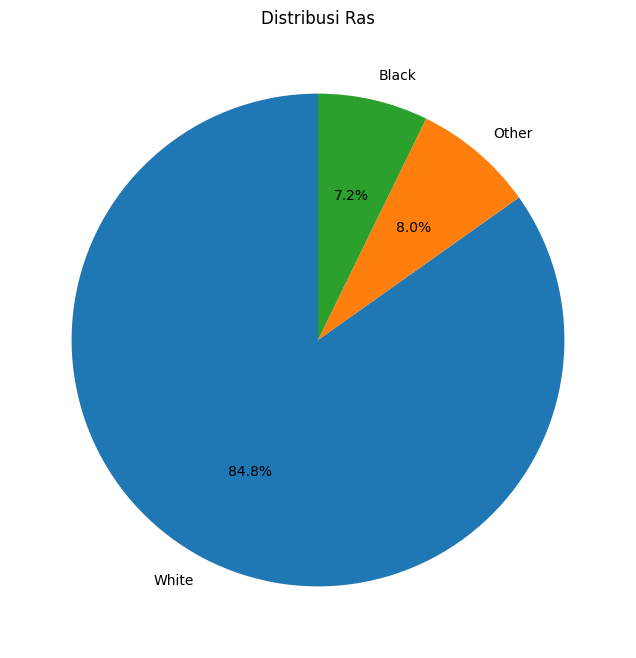

In [32]:
# prompt: buatkan pie cahrt nya

# Misalnya, kita ingin membuat pie chart untuk distribusi 'Race'
race_counts = df['Race'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Ras')
plt.show()

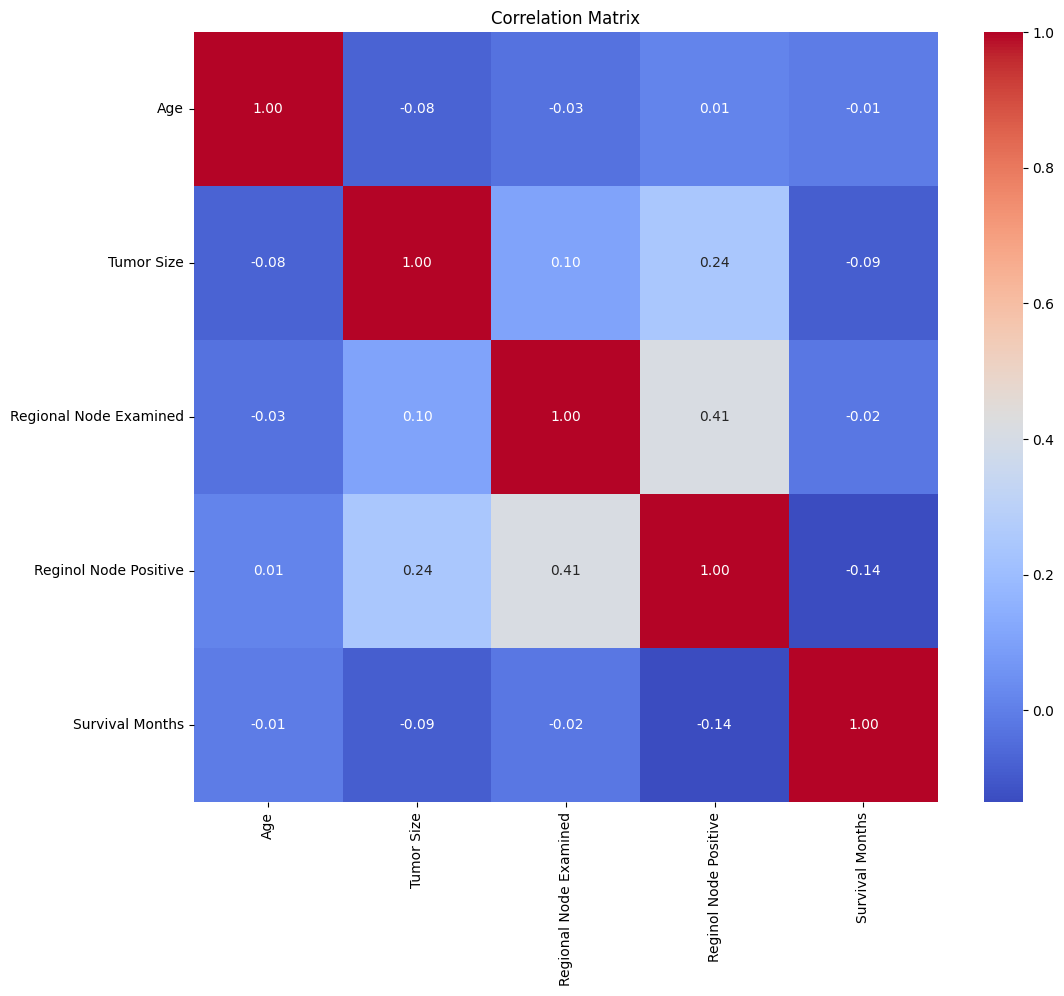

In [38]:


# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

SPLITING X & **Y**

In [47]:
# prompt: SPLITING X & Y

# Tentukan fitur (X) dan target (y)
X = df.drop('Survival Months', axis=1)  # Hapus kolom 'Survival Months' untuk mendapatkan fitur
y = df['Survival Months']  # Kolom 'Survival Months' sebagai target



In [48]:

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# prompt: print kan x_train.shape, x_test.shape

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (3219, 15)
X_test shape: (805, 15)


DESICION TREE

In [67]:
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [75]:


# Tentukan fitur (X) dan target (y)
# Pastikan fitur yang digunakan adalah numerik atau diubah menjadi numerik
X = df.select_dtypes(include=np.number)  # Pilih hanya kolom dengan data numerik
X = X.drop('Survival Months', axis=1)  # Hapus kolom 'Survival Months' untuk mendapatkan fitur
y = df['Survival Months']  # Kolom 'Survival Months' sebagai target



# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# DESICION TREE
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(X_train, y_train)
y_pred_en = clf_entro.predict(X_test)

# Calculate the accuracy score
accuracy_en = accuracy_score(y_test, y_pred_en)
print("Accuracy:", accuracy_en)


# ... (rest of your code) ...

X_train shape: (3219, 4)
X_test shape: (805, 4)
Accuracy: 0.009937888198757764


In [77]:

print('Training set score: {0:0.4f}' .format(clf_entro.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(X_test, y_test)))

Training set score: 0.0286
Test set score: 0.0099


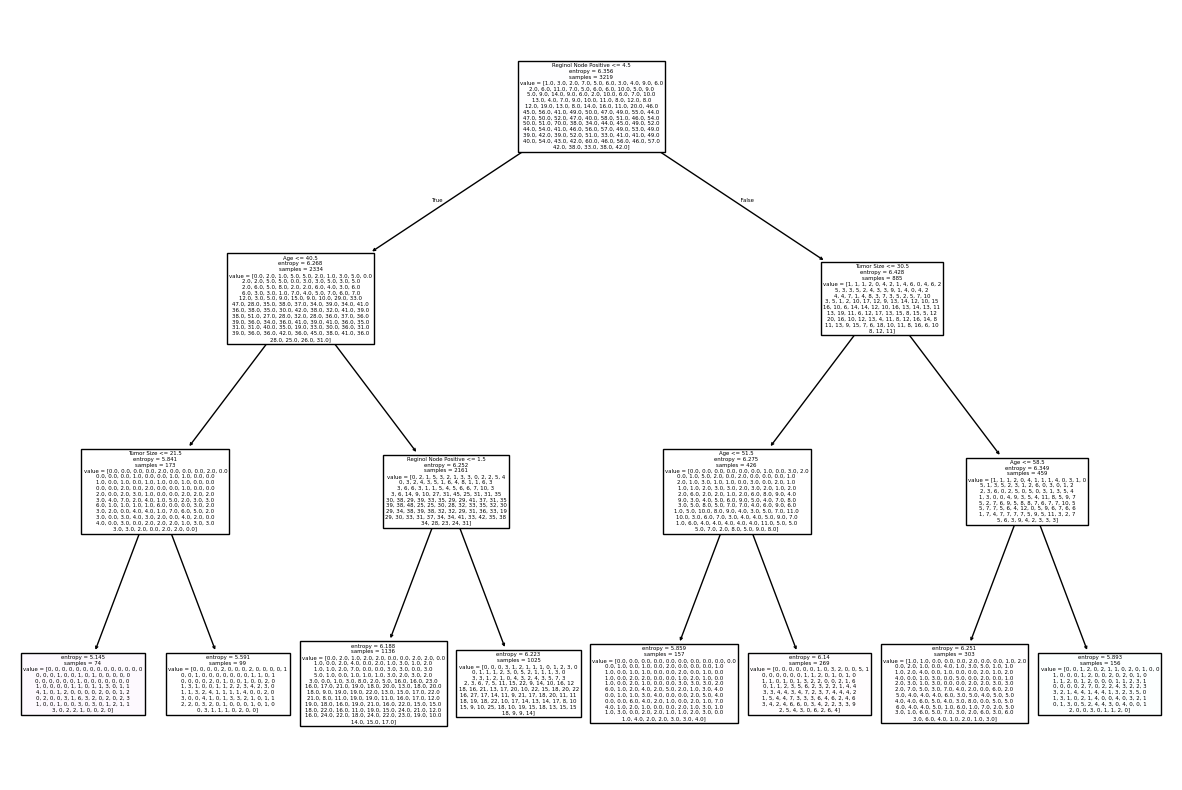

In [82]:
# prompt: buatkan tree nay pada descion tree nya

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_entro, feature_names=X.columns, filled=True)
plt.show()


Criterian Gini Index **teks tebal**

In [83]:
clf_entro = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_entro

DecisionTreeClassifier(max_depth=3, random_state=0)

In [84]:


# Tentukan fitur (X) dan target (y)
# Pastikan fitur yang digunakan adalah numerik atau diubah menjadi numerik
X = df.select_dtypes(include=np.number)  # Pilih hanya kolom dengan data numerik
X = X.drop('Survival Months', axis=1)  # Hapus kolom 'Survival Months' untuk mendapatkan fitur
y = df['Survival Months']  # Kolom 'Survival Months' sebagai target



# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
# DESICION TREE
clf_entro = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_entro.fit(X_train, y_train)
y_pred_en = clf_entro.predict(X_test)

# Calculate the accuracy score
accuracy_en = accuracy_score(y_test, y_pred_en)
print("Accuracy:", accuracy_en)


# ... (rest of your code) ...

X_train shape: (3219, 4)
X_test shape: (805, 4)
Accuracy: 0.013664596273291925


In [85]:

print('Training set score: {0:0.4f}' .format(clf_entro.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(X_test, y_test)))

Training set score: 0.0258
Test set score: 0.0137


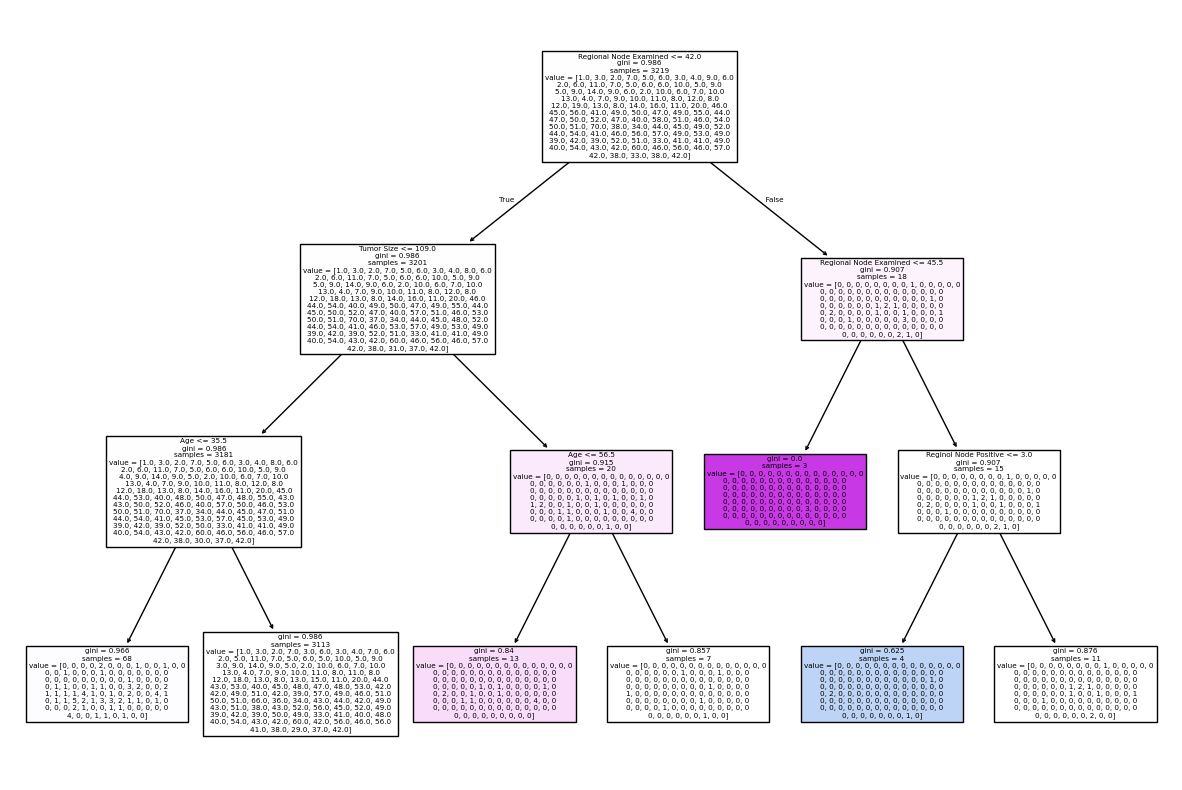

In [86]:
# prompt: buatkan tree nay pada descion tree nya

plt.figure(figsize=(15, 10))
tree.plot_tree(clf_entro, feature_names=X.columns, filled=True)
plt.show()